# Facebook Friend Recommendation Part 3 Models

In [27]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from pandas import read_hdf
from sklearn.metrics import f1_score
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns

## 5. Load Train & Test Dataset

In [3]:
df_final_train = read_hdf('data/fea_sample/storage_sample_stage3.h5', 'train_df',mode='r')

In [4]:
df_final_test = read_hdf('data/fea_sample/storage_sample_stage3.h5', 'test_df',mode='r')

In [6]:
print(df_final_train.shape)
print(df_final_test.shape)

(100002, 20)
(50002, 20)


In [7]:
df_final_train.columns

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followers_d',
       'num_followees_s', 'num_followees_d', 'inter_followers',
       'inter_followees', 'adar_index', 'follow_back', 'shortest_path',
       'weight_in', 'weight_out', 'page_rank_s', 'page_rank_d'],
      dtype='object')

## 5.1 Divide Train data to Train , CV

In [8]:
y_train = df_final_train.indicator_link     ## TRAIN
y_test = df_final_test.indicator_link       ## CV

In [9]:
df_final_train.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)
df_final_test.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)

## 6 Random Forest Algorithm with Hyper parameter tunning

<img src="random.png" width="500" height="300">

Estimators =  10 Train Score 0.9101981320520434 test Score 0.9082734990506537
Estimators =  50 Train Score 0.9224414772247107 test Score 0.9170794467674493
Estimators =  100 Train Score 0.9215076291452395 test Score 0.9166076068981809
Estimators =  250 Train Score 0.9204423755951182 test Score 0.9156429508831565
Estimators =  450 Train Score 0.9193860002972336 test Score 0.9149009474590871


Text(0.5, 1.0, 'Estimators vs score at depth of 5')

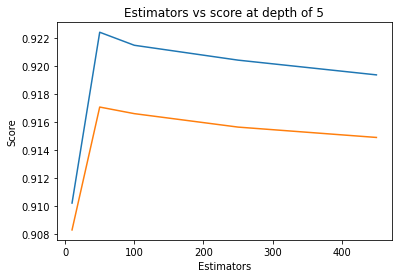

In [17]:
estimators = [10,50,100,250,450]   # Hyper parameter 1 n_estimeters (i.e trees)
train_scores = []
test_scores = []
for i in estimators:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=i, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))    # Calculate F1-score for Train
    test_sc = f1_score(y_test,clf.predict(df_final_test))        # Calculate F1-score for cv
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Estimators = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(estimators,train_scores,label='Train Score')
plt.plot(estimators,test_scores,label='Test Score')
plt.xlabel('Estimators')
plt.ylabel('Score')
plt.title('Estimators vs score at depth of 5')

depth =  3 Train Score 0.8880740043206116 test Score 0.8895838452431478
depth =  9 Train Score 0.9347082620844978 test Score 0.9253965894370235
depth =  11 Train Score 0.9400700642255401 test Score 0.9268271930570918
depth =  15 Train Score 0.9455083133427082 test Score 0.9272519278027287
depth =  20 Train Score 0.9443528911829026 test Score 0.927445865411126
depth =  35 Train Score 0.9444001119252173 test Score 0.9274944332520412
depth =  50 Train Score 0.9444001119252173 test Score 0.9274944332520412
depth =  70 Train Score 0.9444001119252173 test Score 0.9274944332520412
depth =  130 Train Score 0.9444001119252173 test Score 0.9274944332520412


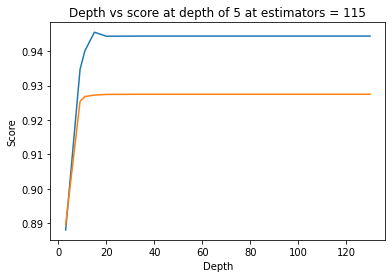

In [19]:
depths = [3,9,11,15,20,35,50,70,130]    #  hyper paramete 2 (i.e max depth)
train_scores = []
test_scores = []
for i in depths:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=i, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=70, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('depth = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(depths,train_scores,label='Train Score')
plt.plot(depths,test_scores,label='Test Score')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.title('Depth vs score at depth of 5 at estimators = 115')
plt.show()

In [21]:
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=11, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=28, min_samples_split=111,
            min_weight_fraction_leaf=0.0, n_estimators=70, n_jobs=-1,
            oob_score=False, random_state=25, verbose=0, warm_start=False)

In [22]:
clf.fit(df_final_train,y_train)
y_train_pred = clf.predict(df_final_train)
y_test_pred = clf.predict(df_final_test)

In [23]:
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.9422858984622743
Test f1 score 0.9272375772768796


In [25]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    # For Precision matrix
    # Of all the 100% points which are predicted to be class 1 only 45% belong to class 1
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    # eg: C = [[1, 2],
      #        [3, 4]]
     # C.T = [[1, 3]
        #     [2, 4]]
        
    # C.sum(axis = 1) ... axis = 1 mean sum up all elements in rows
    # c.sum(axis = 1) = [[3,7]]
    
    #  (C.T/C.sum(axis = 1)) = [[1/3, 3/7],
    #                           [2/3, 4/7]]
    
    # (((C.T)/(C.sum(axis=1))).T) = [[1/3, 2/3]
    #                              [3/7, 4/7]]
    
    #Note: We should calculate such that rows of all elements should be 1
    
    # 1/3 = 0.33 , 2/3 = 0.66 = [0.33 + 0.67] = 1.00
    # sum of row elements = 1
    
    # For Recall matrix
    # 41 % of points which are predicted to be class 1 out of 100 % of points which are actually belongs to be class 1
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
     #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns 
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

Train confusion_matrix


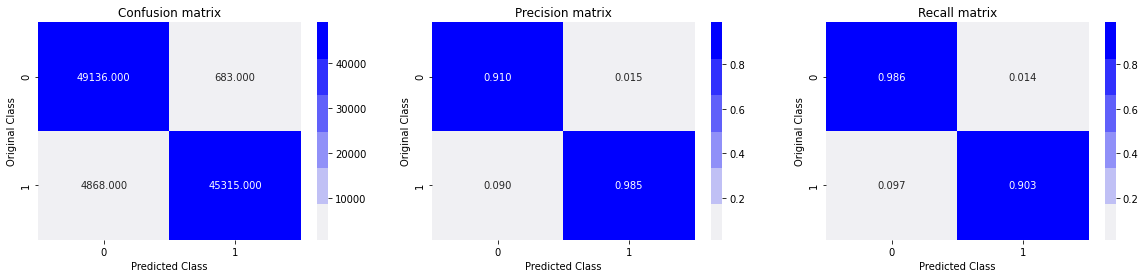

Test confusion_matrix


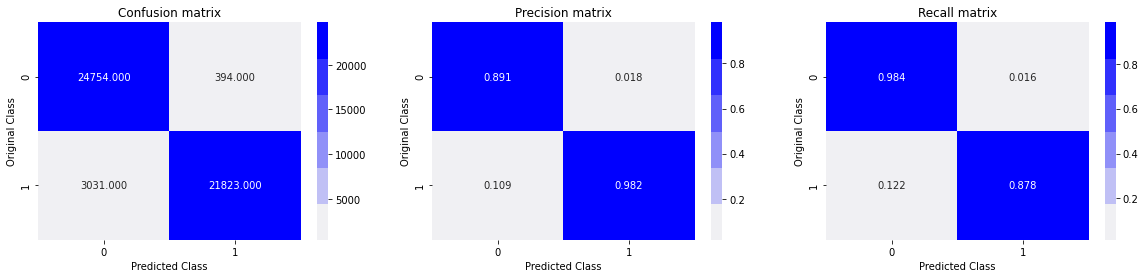

In [28]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

## Very Imp: Find Feature Importance of all features we added to our data

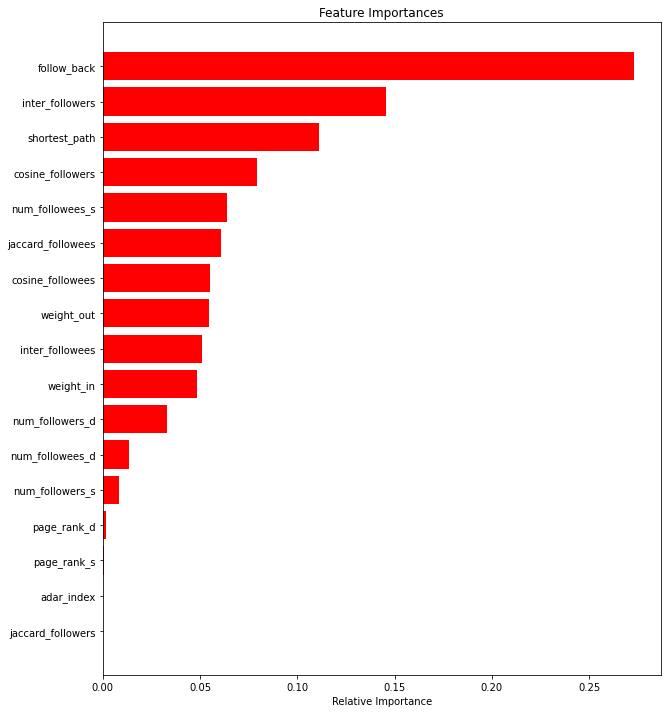

In [29]:
features = df_final_train.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Conclusion:
    
    So we the main task of this Case study was featurization more than modelling, we have added many graph based features some of them using inbilt libraries called networkx and finally applied Random forest classifier with 2 hyper parameters and also observed feature importance on it.
    
### Future Scope:

    In future we can add some more graph based features like Preferentail attachment with followers & followees (link: http://be.amazd.com/link-prediction/) and also use ensemble models like XGBoost  